In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#read data
ads = pd.read_excel("sample_data.xlsx", sheet_name=0, header=1)
ads.head()

,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
0,20230807,1747578422390810,US,USCA,1.0,2023-07-24,5132.1700,4795.250,2022-10-24 14:36:00,1.78,Auction Ads,auction_relation
1,20230807,1758543228094480,SA,MENA,1.0,2023-06-14,1976.2500,1063.767,2023-02-22 15:50:00,1.67,RIE,Ad Group Recall (Merged)
2,20230807,1738303151826990,AU,AU,2.0,2023-07-24,1.7355,5.365,2022-07-14 05:00:00,1.84,Auction Ads,auction_relation
3,20230807,1738303920938010,NZ,NZ,2.0,2023-07-24,NaN,5.365,2022-07-14 05:16:00,1.58,Auction Ads,auction_relation
4,20230807,1738304016410620,NZ,NZ,2.0,2023-07-24,1.5250,5.365,2022-07-14 05:17:00,1.58,Auction Ads,auction_relation


In [24]:
ads.shape

(40679, 12)

In [25]:
#type for each columns
column_formats = ads.dtypes
print(column_formats)

p_date                               int64
ad_id                                int64
delivery_country                    object
queue_market                        object
punish_num                         float64
latest_punish_begin_date    datetime64[ns]
ad_revenue                         float64
avg_ad_revenue                     float64
start_time                  datetime64[ns]
baseline_st                        float64
product_line                        object
task_type_en                        object
dtype: object


In [28]:
dist_country = ads['delivery_country'].nunique()
print(dist_country)


59


In [29]:
dist_qm = ads['queue_market'].nunique()
print(dist_qm)

51


In [51]:
dist_pl = ads['product_line'].nunique()
print(dist_pl)
ads['product_line'].value_counts()

4


product_line
Non-Auction Ads    18669
Auction Ads        13006
RIE                 9001
Shopping Ads           3
Name: count, dtype: int64

In [52]:
dist_task_type = ads['task_type_en'].nunique()
print(dist_task_type)
ads['task_type_en'].value_counts()

9


task_type_en
Promote                     18291
auction_relation            10808
Ad Group Recall (Merged)     6164
Promote Report Recall        2837
auction_all                  2197
R&F                           355
Branding Ads                   23
Shopping Ad Group               3
Auction Ad Group                1
Name: count, dtype: int64

In [32]:
missing_values = ads.isna().sum()
print(missing_values)

p_date                          0
ad_id                           0
delivery_country                0
queue_market                21155
punish_num                  38286
latest_punish_begin_date        0
ad_revenue                  10771
avg_ad_revenue                  0
start_time                   6675
baseline_st                     0
product_line                    0
task_type_en                    0
dtype: int64


In [37]:
ads['punish_num'] = ads['punish_num'].fillna(0)
ads['ad_revenue'].fillna(ads['avg_ad_revenue'], inplace=True)

In [38]:
missing_values = ads.isna().sum()
print(missing_values)

p_date                          0
ad_id                           0
delivery_country                0
queue_market                21155
punish_num                      0
latest_punish_begin_date        0
ad_revenue                      0
avg_ad_revenue                  0
start_time                   6675
baseline_st                     0
product_line                    0
task_type_en                    0
dtype: int64


In [39]:
ads.describe()

,p_date,ad_id,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st
count,40679.0,4.067900e+04,40679.000000,40679,40679.000000,40679.000000,34004,40679.000000
mean,20230807.0,1.772982e+15,0.067086,2001-05-20 15:09:47.536566784,54.780009,23.887703,2023-07-30 23:20:11.472768,1.206670
min,20230807.0,1.697828e+15,0.000000,2000-01-01 00:00:00,0.000000,0.000000,2021-04-23 10:39:00,0.540000
25%,20230807.0,1.773396e+15,0.000000,2000-01-01 00:00:00,0.000000,0.835250,2023-08-04 23:48:00,0.540000
50%,20230807.0,1.773532e+15,0.000000,2000-01-01 00:00:00,2.233600,2.597900,2023-08-07 00:25:00,1.400000
75%,20230807.0,1.773564e+15,0.000000,2000-01-01 00:00:00,12.820750,8.269100,2023-08-07 10:00:00,1.780000
max,20230807.0,1.773617e+15,16.000000,2023-08-07 00:00:00,27100.620000,17144.498600,2023-09-13 07:00:00,7.590000
std,0.0,2.562183e+12,0.337079,NaN,421.777514,187.580436,NaN,0.659845


                punish_num  ad_revenue  avg_ad_revenue  baseline_st
punish_num         1.00000   -0.004000       -0.006130     0.159030
ad_revenue        -0.00400    1.000000        0.505731     0.103210
avg_ad_revenue    -0.00613    0.505731        1.000000     0.108312
baseline_st        0.15903    0.103210        0.108312     1.000000


<Axes: >

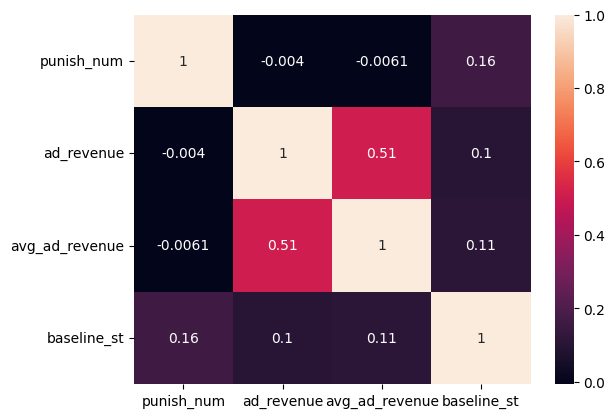

In [58]:
correlation_matrix = ads[['punish_num', 'ad_revenue', 'avg_ad_revenue','baseline_st']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns.values, yticklabels=correlation_matrix.columns.values, annot = True, annot_kws={'size':10})

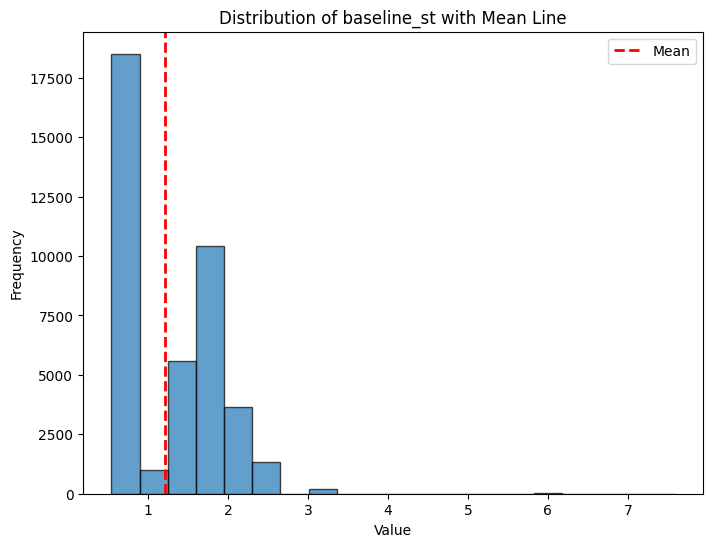

In [43]:
plt.figure(figsize=(8, 6))
plt.hist(ads['baseline_st'], bins=20, edgecolor='k', alpha=0.7)  # Add alpha for transparency
plt.axvline(ads['baseline_st'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Distribution of baseline_st with Mean Line')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()  # Add legend to label the Mean line
plt.show()

/Users/marinayou/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marinayou/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marinayou/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marinayou/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

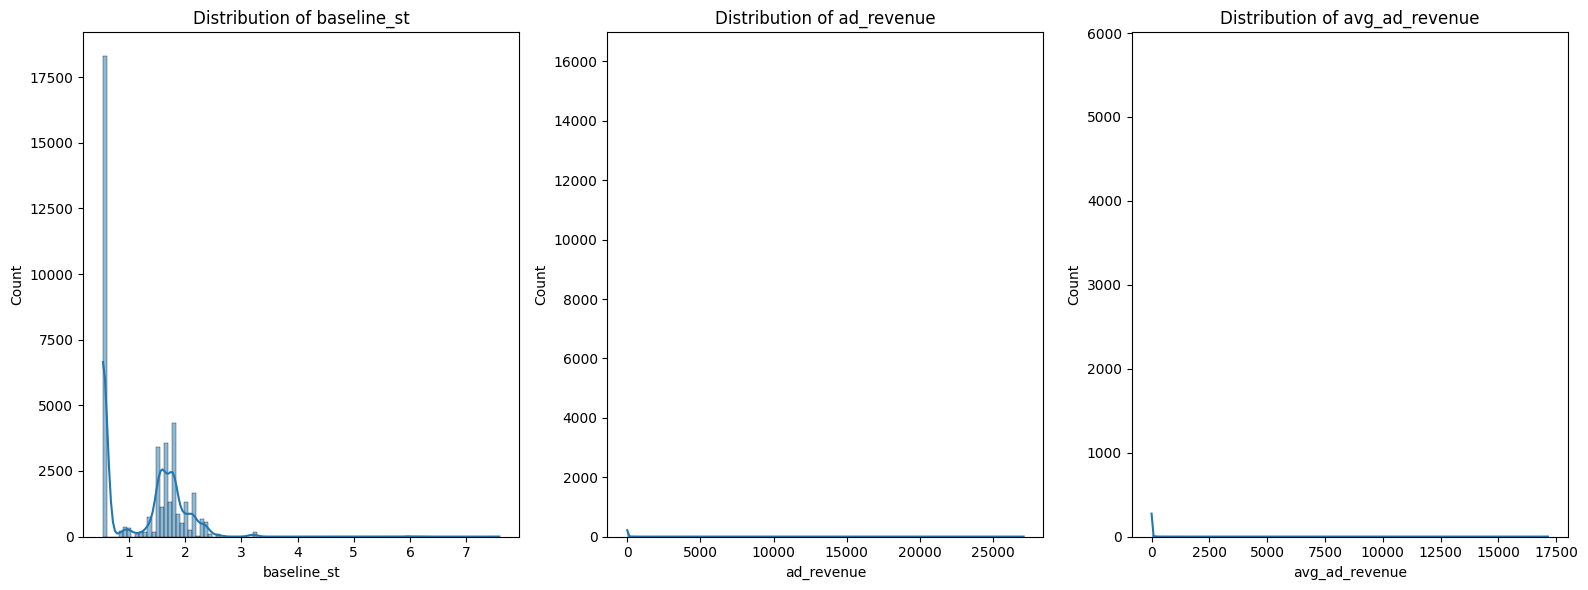

In [49]:

# List of numerical columns to visualize
numerical_columns = ['baseline_st', 'ad_revenue', 'avg_ad_revenue']

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(16, 6))

# If you have only one column, you don't need to flatten the axes
# Loop through each numerical column and create a distribution plot
for i, column in enumerate(numerical_columns):
    sns.histplot(ads[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()

plt.show()


/Users/marinayou/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marinayou/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marinayou/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marinayou/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

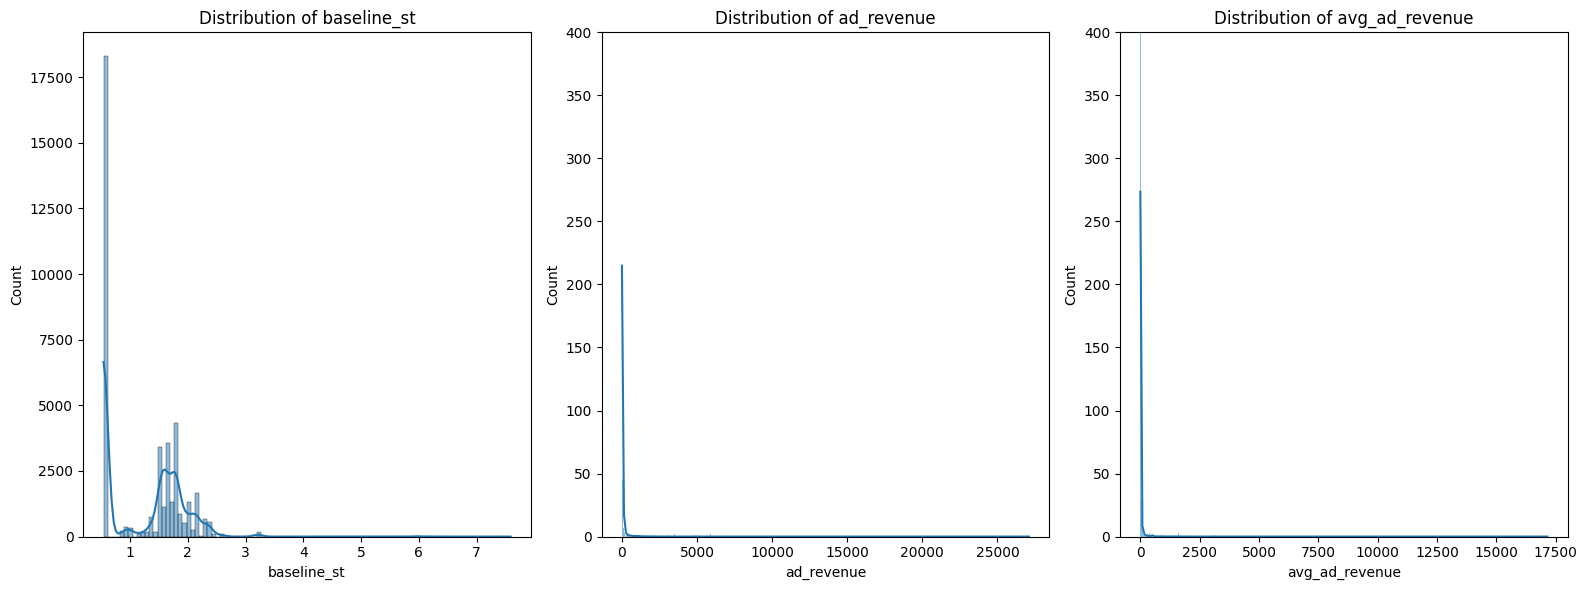

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ads' is your DataFrame

# List of numerical columns to visualize
numerical_columns = ['baseline_st', 'ad_revenue', 'avg_ad_revenue']

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(16, 6))

# If you have only one column, you don't need to flatten the axes
# Loop through each numerical column and create a distribution plot
for i, column in enumerate(numerical_columns):
    sns.histplot(ads[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

    # Set the ylim for the 'ad_revenue' column
    if column == 'ad_revenue':
        axes[i].set_ylim(0, 400) 
    if column == 'avg_ad_revenue':
        axes[i].set_ylim(0, 400)
         # Replace 0 and 1000 with your desired limits

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [59]:
# Define the coefficients
beta0 = 0
beta1 = 1
beta2 = 1.5
beta3 = 1.5
beta4 = -2  # Coefficient for 'punish_num'

# Calculate the predicted values (y) using the linear regression equation
ads['predicted_score'] = (
    beta0 +
    beta1 * ads['ad_revenue'] +
    beta2 * ads['avg_ad_revenue'] +
    beta3 * ads['baseline_st'] +
    beta4 * ads['punish_num']
)

# Print the DataFrame with the predicted scores
print(ads[['ad_revenue', 'avg_ad_revenue', 'baseline_st', 'punish_num', 'predicted_score']])



       ad_revenue  avg_ad_revenue  baseline_st  punish_num  predicted_score
0       5132.1700        4795.250         1.78         1.0       12325.7150
1       1976.2500        1063.767         1.67         1.0        3572.4055
2          1.7355           5.365         1.84         2.0           8.5430
3          0.0000           5.365         1.58         2.0           6.4175
4          1.5250           5.365         1.58         2.0           7.9425
...           ...             ...          ...         ...              ...
40674      0.0000           0.000         0.54         0.0           0.8100
40675      0.0000           0.000         0.54         0.0           0.8100
40676      0.0000           0.000         0.54         0.0           0.8100
40677      0.0000           0.000         0.54         0.0           0.8100
40678      0.0000           0.000         0.54         0.0           0.8100

[40679 rows x 5 columns]
